# COVID-19 Data Visualization

*By Juan Vega*

The purpose of this notebook is to explore the COVID-19 death rate data to identify additional potential features from those already identified in the notebook called `4_eda_geographic.ipynb` that may be used to understand how the currently available data in this project can explain the death rate across U.S. counties between 2020 and 2021.

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from urllib.request import urlopen
import json
import plotly.express as px
import plotly.graph_objects as go

#### Visualize the number of COVID-19 cases and deaths between Jan-2020 - Dec-2021

In the plots that follow, data on the number of COVID-19 cases and deaths by county as reported to the CDC will be analyzed to understand the progression of the virus and disease from its onset in the U.S. in January 2020 until December 2021.

In [2]:
covid_cases = pd.read_csv('./data/COVID-19_Case_Surveillance_Public_Use_Data_with_Geography.csv',
                          dtype={'county_fips_code':str})
covid_cases.head()

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,2021-01,NY,36.0,CHEMUNG,36015,50 to 64 years,Female,Unknown,Unknown,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,NaN
1,2020-09,KS,20.0,ELLIS,20051,50 to 64 years,Female,NaN,NaN,1.0,0.0,Missing,Yes,Laboratory-confirmed case,Symptomatic,Yes,No,No,Yes
2,2020-05,NY,36.0,LEWIS,36049,50 to 64 years,Female,Unknown,Unknown,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,NaN
3,2020-05,MN,27.0,TODD,27153,50 to 64 years,Female,NaN,NaN,0.0,0.0,Missing,Yes,Laboratory-confirmed case,Symptomatic,No,Missing,No,Yes
4,2020-11,WI,55.0,ONEIDA,55085,65+ years,Female,NaN,NaN,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Unknown,Missing,Unknown,NaN


Calculate the number of COVID-19 cases per month.

In [3]:
case_counts = pd.DataFrame(covid_cases.groupby('case_month')['county_fips_code'].count())
case_counts.reset_index(inplace=True)

Calculate the number of deaths from COVID-19 per month.

In [4]:
death_counts = covid_cases[['case_month','death_yn']]

In [5]:
death_counts.death_yn = death_counts.death_yn.apply(lambda x: 1 if x == 'Yes' else 0)

In [6]:
death_counts = pd.DataFrame(death_counts.groupby('case_month')['death_yn'].sum())
death_counts.reset_index(inplace=True)

In the following cells, calculate the number of people ages 18+ who are fully vaccinated

In [7]:
vax = pd.read_csv('./data/COVID-19_Vaccinations_in_the_United_States_County.csv')

In [8]:
vax = vax[['Date','FIPS','Recip_County','Series_Complete_18Plus','Series_Complete_18PlusPop_Pct','SVI_CTGY']]

In [9]:
vax['case_month'] = [''.join(date.split('/')[2]+'-'+date.split('/')[0]) for date in vax.Date]

In [10]:
vaxers = pd.DataFrame(vax.groupby(['case_month','FIPS'])['Series_Complete_18Plus'].max())

In [11]:
vaxers.reset_index(inplace=True)

In [12]:
vaxers = pd.DataFrame(vaxers.groupby('case_month')['Series_Complete_18Plus'].sum())

In [13]:
vaxers.reset_index(inplace=True)

In [14]:
vaxers = vaxers.sort_values(by='case_month')

In [15]:
death_counts = death_counts.merge(vaxers,on='case_month',how='outer')

#### Visualizing the progression of the spread of COVID-19, it can be concluded that:
* During 2020, as the number of COVID-19 cases grew from its first case diagnosed on January 19, 2020 [source](https://www.history.com/this-day-in-history/first-confirmed-case-of-coronavirus-found-in-us-washington-state) to close to 5,000,000 cases, the number of deaths due to COVID-19 also skyrocketed reaching a peak of above 5,000 during April 2020 and over 6,000 in December 2020.
* As the COVID-19 vaccine became available in December, 2020, [source](https://www.bbc.com/news/world-us-canada-55305720), the number of deaths due to COVID-19 has continuously declined during 2021, although there was an increase in the number of COVID-19 related deaths between June and August that was followed by a decline in the following months.
* The number of COVID-19 cases can rapidly increased between June and December, 2021, although with fewer deaths compared to pre-vaccine levels.
* As the number of vaccinated people across all counties in the U.S. has increased from December, 2020, the numbers of deaths has decreased steadily.
* The percentage of the county population that is fully vaccinated will be used as a factor in understanding whether a county is in need of COVID-19 relief support. Counties with low vaccination rates will be analyzed with special attention.

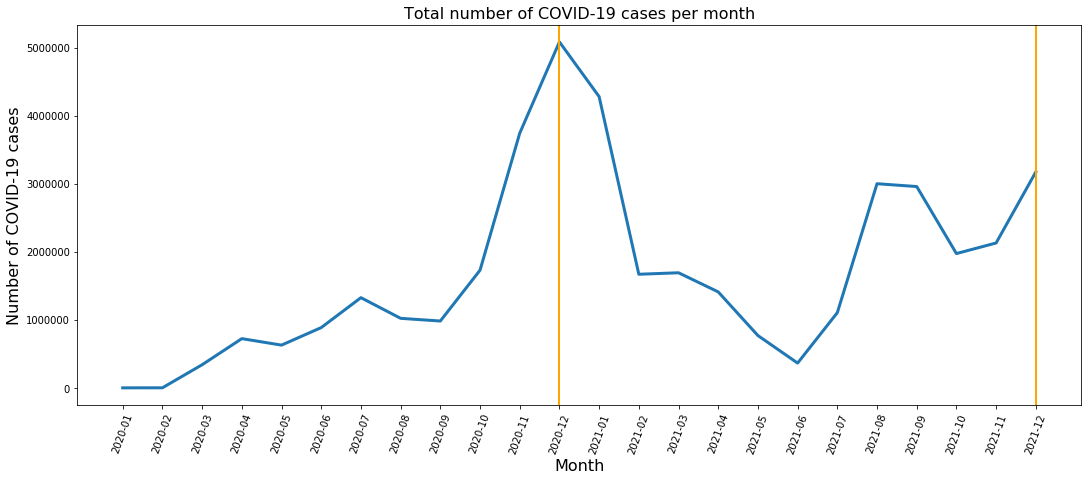

In [16]:
plt.figure(figsize=(18,7))
plt.title('Total number of COVID-19 cases per month',size=16)
plt.xlabel('Month',size=16)
plt.ylabel('Number of COVID-19 cases',size=16)
plt.plot(case_counts.case_month,case_counts.county_fips_code, lw=3)
plt.axvline(x = '2020-12', color = 'orange', label = 'axvline - full height',lw=2)
plt.axvline(x = '2021-12', color = 'orange', label = 'axvline - full height',lw=2)

plt.xticks(rotation=70);

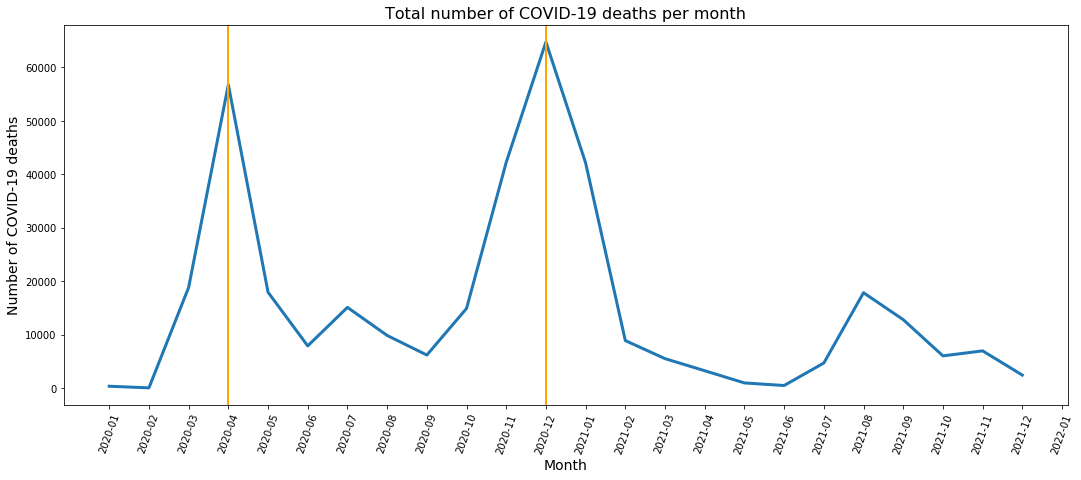

In [17]:
plt.figure(figsize=(18,7))
plt.title('Total number of COVID-19 deaths per month',size=16)
plt.xlabel('Month',size=14)
plt.ylabel('Number of COVID-19 deaths',size=14)
plt.plot(death_counts.case_month,death_counts.death_yn, lw=3)
plt.axvline(x = '2020-12', color = 'orange', label = 'axvline - full height',lw=2)
plt.axvline(x = '2020-04', color = 'orange', label = 'axvline - full height',lw=2)

plt.xticks(rotation=70);

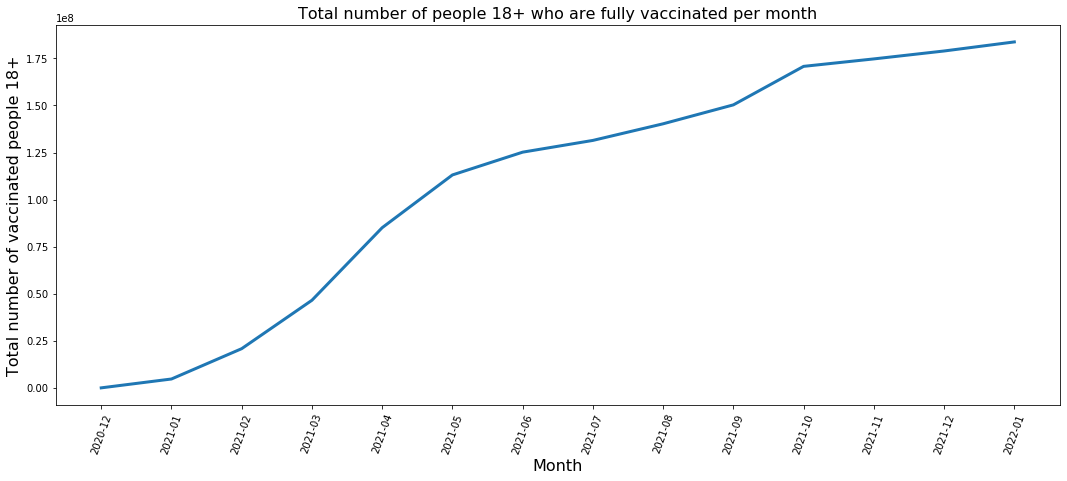

In [18]:
plt.figure(figsize=(18,7))
plt.title('Total number of people 18+ who are fully vaccinated per month',size=16)
plt.xlabel('Month',size=16)
plt.ylabel('Total number of vaccinated people 18+',size=16)
plt.plot(vaxers.case_month,vaxers.Series_Complete_18Plus, lw=3)

plt.xticks(rotation=70);

### Evaluate the relationship between vaccination and death rates per capita as of the latest data available

In a previous EDA, the death rate and other features were analyzed using the medians of the features across time to create a data set that is as close to cross sectional as possible. In the cells below, to create a cross section of the data is created from the latest month of data available in all relevant data sets, or December 2021.

Calculate the death rate per capita using only the data for the month of December.

In [19]:
covid_cases_latest = covid_cases[covid_cases['case_month']=='2021-12'][['county_fips_code','res_county','death_yn']]

In [20]:
covid_cases_latest.death_yn = covid_cases_latest.death_yn.apply(lambda x: 1 if x == 'Yes' else 0)

In [21]:
covid_cases_latest = covid_cases_latest.groupby('county_fips_code')['death_yn'].sum()

In [22]:
covid_cases_latest = pd.DataFrame(covid_cases_latest)

In [23]:
covid_cases_latest.reset_index(inplace=True)

In [24]:
census_pop = pd.read_csv('./data/cc-est2019-alldata.csv',encoding = "ISO-8859-1",dtype={'STATE':str,
                                                                                        'COUNTY':str})


In [25]:
census_pop = census_pop[(census_pop['AGEGRP'] == 0) & (census_pop['YEAR']==12) & (census_pop['SUMLEV']==50)]
census_pop = census_pop[['STNAME','CTYNAME','STATE','COUNTY','TOT_POP']]
census_pop['COUNTY'] = census_pop['STATE'] + census_pop['COUNTY']
census_pop.rename(columns={'COUNTY':'county_fips_code'},inplace=True)
census_pop.columns = census_pop.columns.str.lower()
census_pop.drop(columns='state',inplace=True)

In [26]:
covid_cases_latest = covid_cases_latest.merge(census_pop, how='left', on='county_fips_code')

In [27]:
covid_cases_latest['death_rate'] = 100_000 * (covid_cases_latest['death_yn']/covid_cases_latest['tot_pop'])

Calculate the maximum percentage of the population within the month of December that is fully vaccinated in December.

In [28]:
vaxers_pct = vax[vax['case_month']=='2021-12']

In [29]:
vaxers_pct = pd.DataFrame(vaxers_pct.groupby(['FIPS','case_month'])['Series_Complete_18PlusPop_Pct'].max())
vaxers_pct.reset_index(inplace=True)

In [30]:
vaxers_pct.rename(columns={'FIPS':'county_fips_code'},inplace=True)

In [31]:
covid_cases_latest = covid_cases_latest.merge(vaxers_pct, how='left', on = 'county_fips_code')

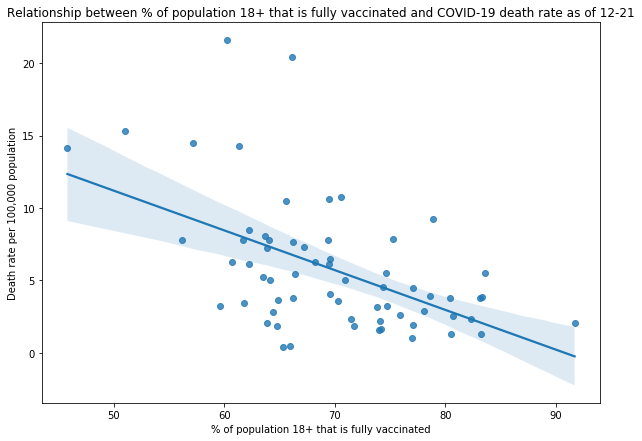

In [32]:
plt.figure(figsize=(10,7))
plt.title('Relationship between % of population 18+ that is fully vaccinated and COVID-19 death rate as of 12-21')
sns.regplot(data=covid_cases_latest[covid_cases_latest['death_rate']>0], 
                x='Series_Complete_18PlusPop_Pct',
                y='death_rate')
plt.xlabel('% of population 18+ that is fully vaccinated')
plt.ylabel('Death rate per 100,000 population');

It appears that as a higher share of the population ages 18+ is vaccinated, the death rate per capita per 100,000 population tends to be lower. Counties with low vaccination rates should be prioritized for further attention. Below, plot U.S. counties that have the highest death rates per capita, a death rate per capita above the median, and correlate the death rates with the vaccination rate among 18+ adult population.

The following maps are inspired from Plotly's documentation on Choropleth maps [source](https://plotly.com/python/choropleth-maps/).

**Some of counties with the lowest vaccination rates, particularly in Georgia, are among the counties with the highest median death rates across the U.S. counties and are also counties with a death rate above the 75th percentile.**

*These counties should be targeted for more support in accessing the COVID-19 vaccines through education programs and removing barriers to vaccination.*

Produce a data set to plot the share of the population ages 18+ that is fully vaccinated.

In [33]:
county_names = covid_cases[['res_county','county_fips_code']].drop_duplicates()

In [34]:
covid_cases_latest = covid_cases_latest.merge(county_names, how='left', on='county_fips_code')

In the cells below, produce the data required for a map plotting the median death rates between 2020-2021 by county and whether a county has a death rate that is above the 75th percentile of all death rates across counties. 

In [35]:
df = pd.read_csv('./data/merged_dataset.csv')

In [36]:
df['county_fips_code'] = ['0'+str(fips) if len(str(fips)) == 4 else str(fips) for fips in df.county_fips_code]

In [37]:
df['deaths_per_hun_thou'] = df['deaths_per_hun_thou'].astype(int)

In [38]:
death_rate_75_pctile = np.percentile(df['deaths_per_hun_thou'],75)

In [39]:
df['death_rate_75_pctile'] = df['deaths_per_hun_thou'].apply(lambda x: 1 if x > death_rate_75_pctile else 0)

In [40]:
### Use JSON file from Plotly to locate every county on a map based on its FIPS code
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

In [41]:
### Create a function to produce maps
def map_viz(df,feature,color_scale,title,name):
    figure = px.choropleth(df, geojson=counties, locations='county_fips_code', color=feature,
                        color_continuous_scale=color_scale,
                        range_color=(0,df[feature].max()),
                        scope="usa",
                        labels={feature:title},
                        hover_name=name)
    figure.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
    figure.show()
    return

In [62]:
#map_viz(covid_cases_latest,'Series_Complete_18PlusPop_Pct','burgyl','% of population ages 18+ fully vaccinated','res_county')

In [63]:
# map_viz(df,'deaths_per_hun_thou','burgyl','Median death rate per county (2020-2021)','ctyname')

In [64]:
 #map_viz(df,'death_rate_75_pctile','burgyl','Median death rate per county (2020-2021)','ctyname')

The distribution of the death rate per capita based on the proportion of cumulative deaths per county as reported by The New York Times is close to symmetrical, with some counties with very high death rates.

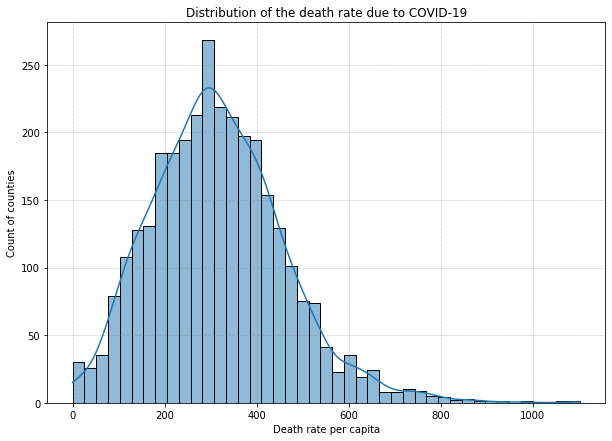

In [45]:
plt.figure(figsize=(10,7))
plt.title('Distribution of the death rate due to COVID-19')
plt.xlabel('Death rate per capita')
plt.ylabel('Count of counties')
sns.histplot(df['deaths_per_hun_thou'],kde=True)
plt.grid(color='grey', linestyle=':', linewidth=0.5);

### From the latest cases from December, 2021, it appears that the death rate per capita tends to be higher among counties with higher values of the Social Vulnerability Index (SVI) [source](https://www.atsdr.cdc.gov/placeandhealth/svi/at-a-glance_svi.html)

The SVI is a measure of a community's resiliency when confronted by external stressors such as natural disasters or disease outbreaks such as COVID-19. Category `A` is the most resilient category and category `D` is the least resilient category. It appears that overall the death rate per capita is higher among less resilient communities and counties (`B`-`D`) compared to more resilient communities such as those in category `A`. 

The federal and state government and local agencies should monitor these data and channel resources in the directly of the most vulnerable communities.

In [46]:
vax_svi = vax[vax['case_month']=='2021-12'][['FIPS','SVI_CTGY']].drop_duplicates().\
    rename(columns={'FIPS':'county_fips_code'})

In [47]:
covid_cases_latest = covid_cases_latest.merge(vax_svi, how='left', on='county_fips_code')

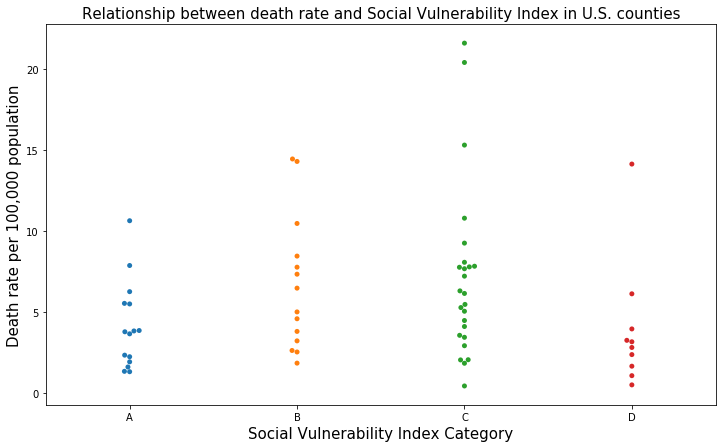

In [48]:
plt.figure(figsize=(12,7))
ax = sns.swarmplot(x="SVI_CTGY", y="death_rate", data=covid_cases_latest[covid_cases_latest['death_rate']>0],
                  order=['A','B','C','D'])
plt.title('Relationship between death rate and Social Vulnerability Index in U.S. counties', size=15)
plt.ylabel('Death rate per 100,000 population',size=15)
plt.xlabel('Social Vulnerability Index Category',size=15);

#### Other factors that may affect a community's survival as measured by the death rate per capita is the degree of transmissibility of COVID-19

In [49]:
transmission = pd.read_csv('./data/United_States_COVID-19_County_Level_of_Community_Transmission_Historical_Changes.csv',
                         dtype={'fips_code':str}).rename(columns={'fips_code':'county_fips_code'})

Keep only the latest data for the analysis and identify whether the is a correlation between a high level of community transmissibility and the death rate with the latest data available from December, 2021.

In [50]:
transmission['case_month'] = [''.join(date.split('/')[2]+'-'+date.split('/')[0]) for date in transmission.date]

In [51]:
transmission = transmission[transmission['case_month'] == '2021-12']

In [52]:
transmission = pd.get_dummies(transmission, columns=['community_transmission_level'])

In [53]:
transmission = pd.DataFrame(transmission.groupby('county_fips_code')[['community_transmission_level_high',
                                         'community_transmission_level_low',
                                         'community_transmission_level_moderate',
                                         'community_transmission_level_substantial']].sum() / 31)

In [54]:
for col in transmission.columns:
    transmission[col] = 100 * transmission[col]

In [55]:
transmission.reset_index(inplace=True)

In [56]:
transmission.head()

,county_fips_code,community_transmission_level_high,community_transmission_level_low,community_transmission_level_moderate,community_transmission_level_substantial
0,01001,58.064516,0.0,6.451613,35.483871
1,01003,32.258065,0.0,19.354839,48.387097
2,01005,16.129032,0.0,61.290323,22.580645
3,01007,38.709677,0.0,3.225806,58.064516
4,01009,100.000000,0.0,0.000000,0.000000


In [57]:
covid_cases_latest = covid_cases_latest.merge(transmission, how='left', on='county_fips_code')

In [58]:
covid_cases_latest['high_transmission'] = covid_cases_latest['community_transmission_level_high'] + \
                                          covid_cases_latest['community_transmission_level_substantial']

In [59]:
for transmission in ['high','low','moderate','substantial']:
    covid_cases_latest['community_transmission_level_'+transmission] = \
        covid_cases_latest['community_transmission_level_'+transmission].apply(lambda x: 'Yes' if x > 50 else 'No')

In [60]:
covid_cases_latest.head()

,county_fips_code,death_yn,stname,ctyname,tot_pop,death_rate,case_month,Series_Complete_18PlusPop_Pct,res_county,SVI_CTGY,community_transmission_level_high,community_transmission_level_low,community_transmission_level_moderate,community_transmission_level_substantial,high_transmission
0,01001,0,Alabama,Autauga County,55869,0.0,2021-12,46.8,AUTAUGA,B,Yes,No,No,No,93.548387
1,01003,0,Alabama,Baldwin County,223234,0.0,2021-12,57.4,BALDWIN,A,No,No,No,No,80.645161
2,01005,0,Alabama,Barbour County,24686,0.0,2021-12,50.2,BARBOUR,D,No,No,Yes,No,38.709677
3,01007,0,Alabama,Bibb County,22394,0.0,2021-12,39.1,BIBB,C,No,No,No,Yes,96.774194
4,01009,0,Alabama,Blount County,57826,0.0,2021-12,36.6,BLOUNT,B,Yes,No,No,No,100.000000


COVID-19 is a highly transmissible virus across all counties in the United States, as most counties had 100% of days categorized as highly transmissible. There is no relationship either between high transmissibility and the death rate, which implies that the added support from the vaccines have helped diminish the impact of the virus on the death rate due to COVID-19.

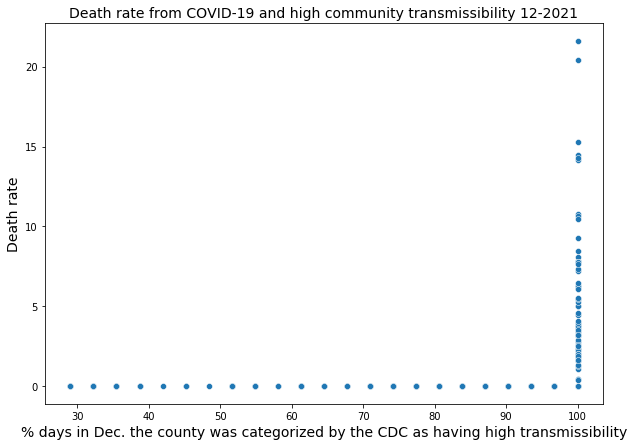

In [61]:
plt.figure(figsize=(10,7))
plt.title('Death rate from COVID-19 and high community transmissibility 12-2021',size=14)
plt.ylabel('Death rate',size=14)
plt.xlabel('% days in Dec. the county was categorized by the CDC as having high transmissibility',size=14)
sns.scatterplot(data=covid_cases_latest,
                x=covid_cases_latest['high_transmission'],
                y=covid_cases_latest['death_rate']);

These analyses demonstrate that as the number of people who get vaccinated increases, overall, the death rate from COVID-19 tends to decrease. Also, certain counties with higher levels of social vulnerability appear to have higher death rates using the most recent data. The social vulnerability classification as well as the percentage of the population that is fully vaccinated should be considered as potential predictors of the death rate, using the latest data available.

Counties in Georgia, with a low vaccination rate also appear to have some of the highest median death rates between 2020-2021. More efforts should be implemented in these counties to encourage citizens to take the vaccine and remove barriers to access.